# 3. Supervised learning algorithm (지도 학습 알고리즘)

## 3-1. 예제에 사용할 데이터셋

X.shape: (26, 2)


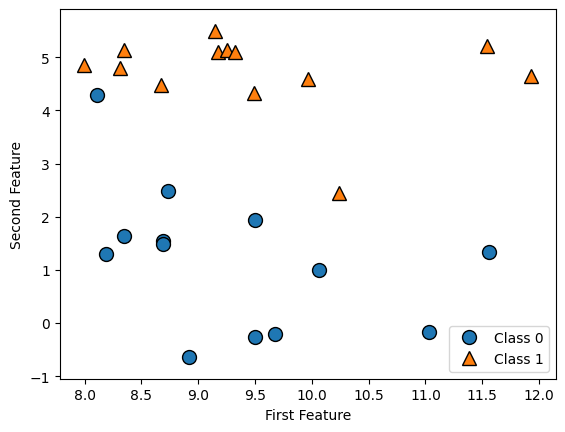

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

# 두 개의 특성을 가진 인위적으로 만든 이진 분류 데이터셋인 forge 데이터셋을 생성
X, y = mglearn.datasets.make_forge()
# 산점도를 생성
mglearn.discrete_scatter(X[:, 0], X[:,1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
print("X.shape:", X.shape);

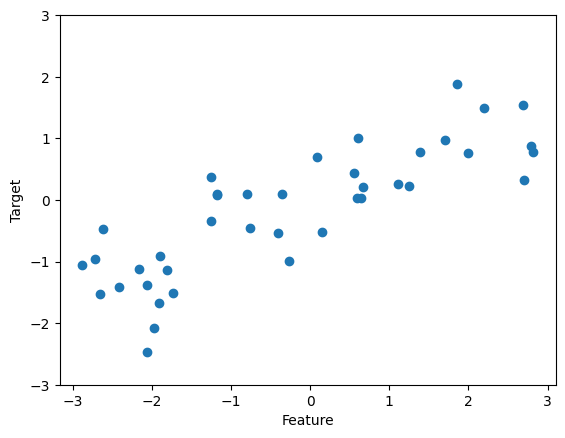

In [2]:
# 희귀 알고리즘 설명에는 인위적으로 만든 wave 데이터셋을 사용
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target");

In [3]:
# scikit-learn에 있는 load_breast_cancer 함수를 사용하여 불러올 수 있음
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.key():\n", cancer.keys())

cancer.key():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
# 이 데이터셋은 569개의 데이터 포인트를 가지고 있고 특성은 30개
print("유방암 데이터의 형태:", cancer.data.shape)

유방암 데이터의 형태: (569, 30)


In [5]:
# 569개 데이터 포인트 중 212개는 악성이고 357개는 양성
print("클래스별 샘플 개수:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [6]:
# feature_names 속성을 확인
print("특성 이름:\n", cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [7]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston')
print("데이터의 형태:", boston.data.shape)

데이터의 형태: (506, 13)


c:\Python311\Lib\site-packages\sklearn\datasets\_openml.py:311: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
c:\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [8]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


## 3-2. k-최근접 이웃
- k-최근접(k-Nearest Neighbors) 알고리즘은 가장 간단한 머신러닝 알고리즘
- 훈련 데이터셋을 그냥 저장하는 것이 모델을 만드는 과정의 전부
- 새로운 데이터 포인트에 대해 예측할 때는 알고리즘이 훈련 데이터셋에서 가장 가까운 데이터 포인트, 즉 '최근접 이웃'을 찾음
### k-최근접 이웃 분류

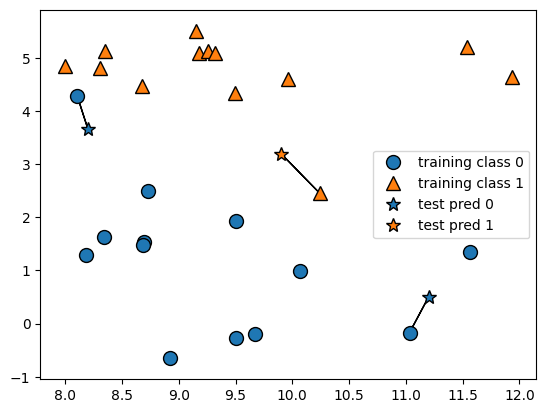

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

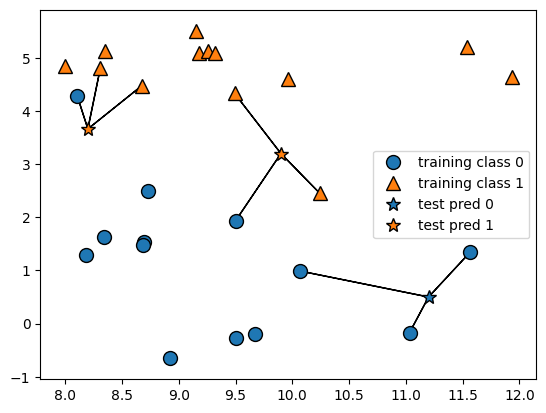

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [11]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [13]:
# 훈련 세트를 사용하여 분류 모델을 학습
# KNeighborsClassifier에서의 학습은 예측할 때 이웃을 찾을 수 있도록 데이터를 저장
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
print("테스트 세트 예측:", clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [15]:
# 모델이 얼마나 잘 일반화되었는지 평가하기 위해 score 메서드에 테스트 데이터와 테스트 레이블을 넣어 호출
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


### KNeighborsClassifier 분석
- 2차원 데이터셋이므로 가능한 모든 테스트 포인트 예측을 xy 평면에 그려볼 수 있음
- 각 데이터 포인트가 속한 클래스에 따라 평면에 색을 칠하면 알고리즘의 클래스 0과 클래스 1로 지정한 영역으로 나뉘는 결정 경계(decision boundary)를 볼 수 있음

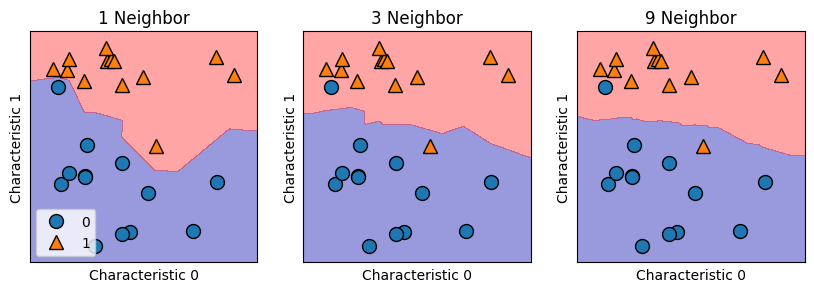

In [16]:
# 이웃이 1, 3, 9 개일 때의 결정 경계를 보여줌
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
  # fit 메서드는 self 오브젝트를 리턴
  # 그래서 객체 생성과 fit 메서드를 한 줄에 쓸 수 있음
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title("{} Neighbor".format(n_neighbors))
  ax.set_xlabel("Characteristic 0")
  ax.set_ylabel("Characteristic 1")
axes[0].legend(loc=3);

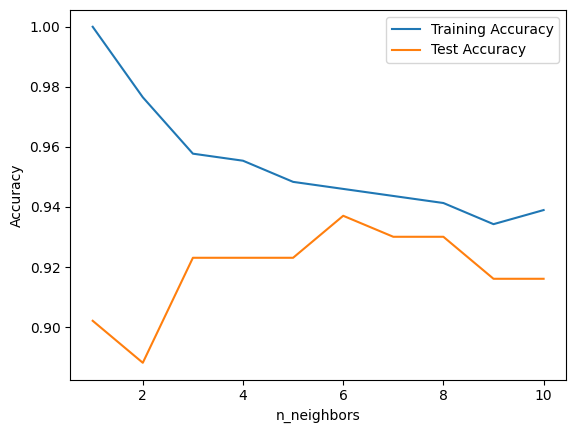

In [17]:
# 모델의 복잡도와 일반화 사이의 관계를 입증
# 훈련 세트와 테스트 세트로 나누고, 이웃의 수를 달리하여 훈련 세트와 테스트 세트의 성능을 평가
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
  cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  # 훈련 세트 정확도 저장
  training_accuracy.append(clf.score(X_train, y_train))
  # 일반화 정확도 저장
  test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend();

### k-최근접 이웃 회귀

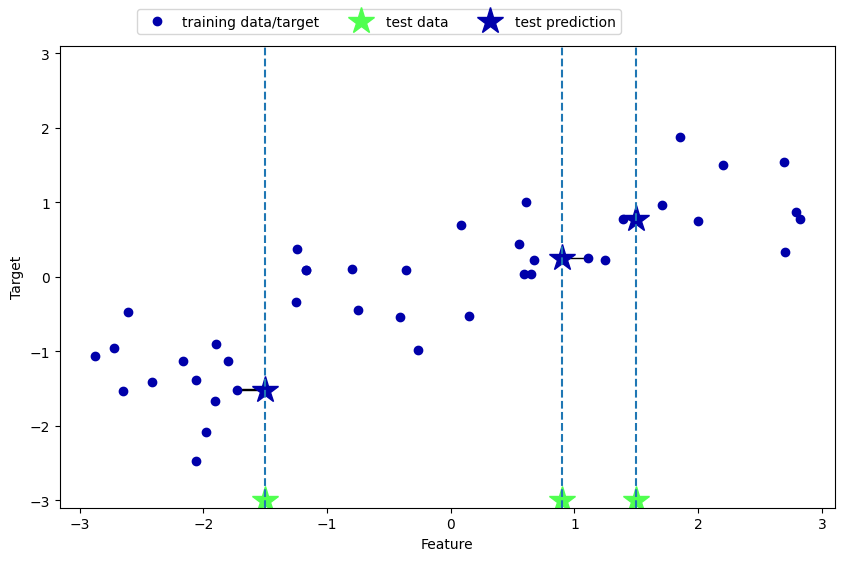

In [18]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

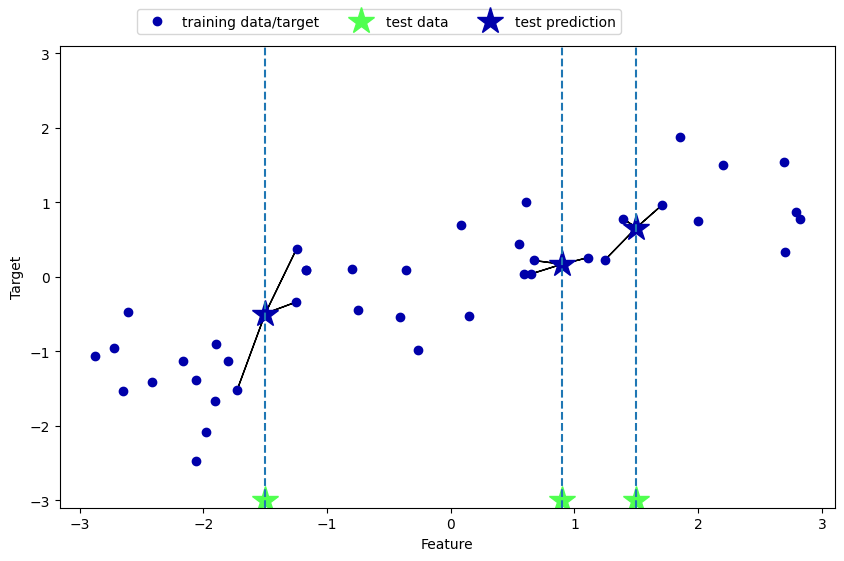

In [19]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [20]:
# scikit-learn에서 회귀를 위한 k-최근접 이웃 알고리즘은 KNeighborsRegressor에 구현되어있음
# 사용범은 KNeighborsClassifier와 유사
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듦
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킴
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [21]:
print("테스트 세트 예측:\n", reg.predict(X_test))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [22]:
# 결정 계수인 R^2값은 회귀 모델에서 예측의 적합도를 측정한 것으로 보통 0에서 1 사이의 값임
# 1은 예측이 완벽한 경우, 0은 훈련 세트의 출력값인 y_train의 평균으로만 예측하는 모델의 경우
# R^2은 음수가 되는 경우, 예측과 타깃이 상반된 경향을 가지는 경우
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


### KNeighborsRegressor 분석
- 1차원 데이터셋에 대해 가능한 모든 특성 값을 만들어 예측해볼 수 있음
- x축을 따라 많은 포인트를 생성해 테스트 데이터셋을 만듦

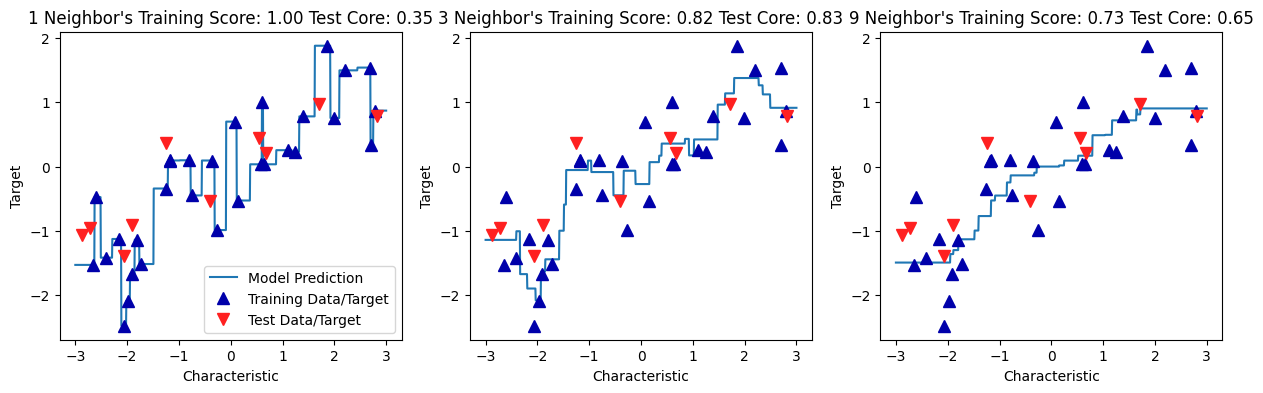

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3과 3 사이에 1000개의 데이터 포인트를 만듦
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
  # 1, 3, 9 이웃을 사용한 예측을 함
  reg = KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(X_train, y_train)
  ax.plot(line, reg.predict(line))
  ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
  ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

  ax.set_title("{} Neighbor's Training Score: {:.2f} Test Core: {:.2f}".format(
    n_neighbors, reg.score(X_train, y_train),
    reg.score(X_test, y_test)))
  ax.set_xlabel("Characteristic")
  ax.set_ylabel("Target")
axes[0].legend(["Model Prediction", "Training Data/Target",
                "Test Data/Target"], loc="best");

이웃을 많이 사용하면 훈련 데이터에는 잘 안 맞을 수 있지만, 더 안정된 예측을 얻을 수 있음

### 장단점과 매개변수
- 일반적으로 KNeighbors 분류기에 중요한 매개변수는 '데이터 포인트 사이의 거래를 재는 방법'과 '이웃의 수'
- 실제로 이웃의 수는 3개나 5개 정도로 적을 때 잘 작동하지만, 이 매개변수는 잘 조정해야 함
- 거리 재는 방법은 기본적으로 여러 환경에서 잘 작동하는 유클리디안 거리 방식을 사용
- k-NN의 장점은 이해하기 매우 쉬운 모델이고 많이 조정하지 않아도 자주 좋은 성능을 발휘할 수 있으므로, 더 복잡한 알고리즘을 적용해보기 전에 시도해볼 수 있는 좋은 시작점
- 보통 최근점 이웃 모델은 매우 빠르게 만들 수 있지만, 훈련 세트가 매우 크면 (특성의 수나 샘플의 수가 클 경우) 예측이 느려짐
- k-NN 알고리즘을 사용할 땐 데이터를 전처리하는 과정이 중요
- (수백 개 이상의) 많은 특성을 가진 데이터셋에는 잘 동작하지 않으며, 특성 값 대부분이 0인 (희소한) 데이터셋과는 특히 잘 작동하지 않음
- k-최근접 이웃 알고리즘이 이해하긴 쉽지만 예측이 느리고 많은 특성을 처리하는 능력이 부족해 현업에서는 잘 쓰지 않음

## 3-3. 선형 모델 (Linear Model)
- 선형 모델은 입력 특성에 대한 선형 함수를 만들어 예측을 수행

w[0]: 0.393906  b: -0.031804


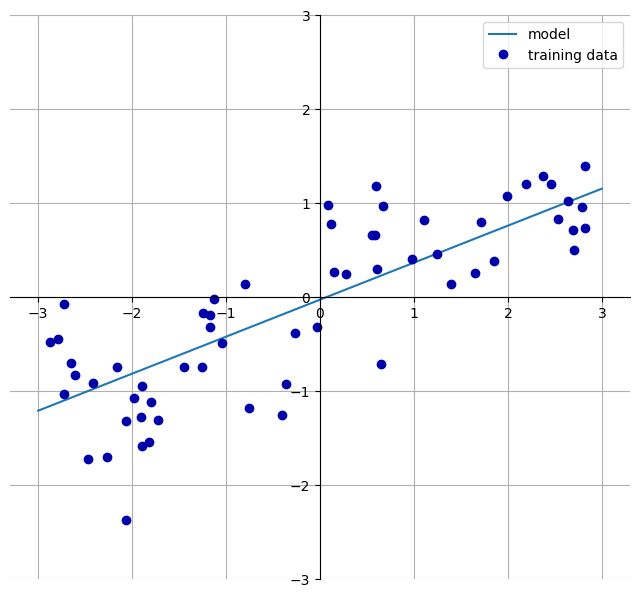

In [24]:
mglearn.plots.plot_linear_regression_wave()

### 선형 회귀 (Linear Regrssion) or 최소제곱법 (OLS, Ordinary Least Squares)
- 선형 회귀는 예측과 훈련 세트에 있는 타깃 y사이의 평균제곱오차(Mean Squared Error)를 최소화하는 파라미터 w와 b를 찾음
- 평균제곱오차는 예측값과 타깃 값의 차이를 제곱하여 더한 후에 샘플의 개수로 나눈 것
- 선형 회귀는 매개변수가 없는 것이 장점이지만, 모델의 복잡도를 제어할 방법도 없음

In [25]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

- 기울기 파라미터(w)는 가중치(weight) 또는 계수(coefficient)라고 하며 lr 객체의 coef_ 속성에 저장되어 있음
- 편향(offset) 또는 절편(intercept) 파라미터(b)는 intercept_ 속성에 저장되어 있음
- coef_와 intercept_ 뒤의 항상 밑줄을 붙이는 이유는 scikit-learn에서 사용자가 지정한 매개변수와 훈련 데이터에서 유도된 속성을 구분하기 위한 목적

In [26]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


- intercept_ 속성은 항상 실수 값 하나지만, coef_ 속성은 각 입력 특성에 하나씩 대응되는 NumPy 배열
- wave 데이터셋에는 입력 특성이 하나뿐이므로 lr.coef_도 원소를 하나만 가지고 있음

In [27]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


- R^2 값이 0.66인 것은 그리 좋은 결과는 아니지만, 훈련 세트와 테스트 세트의 점수가 매우 비슷한데, 이는 과대적합이 아니라 과소적합인 상태를 의미
- 1차원 데이터셋에서는 모델이 매우 단순하므로 (혹은 제한적이므로) 과대 적합을 걱정할 필요가 없음
- 반면, (특성이 많은) 고차원 데이터셋에서는 선형 모델의 성능이 매우 높아져서 과대적합될 가능성이 높음

In [28]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [29]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


- 훈련 세트와 테스트 세트의 점수를 비교해보면 훈련 세트에서는 예측이 매우 정확한 반면 테스트 세트에서는 R^2 값이 매우 낮음
- 훈련 데이터와 테스트 데이터 사이의 이런 성능 차이는 모델이 과대적합되었다는 확실한 신호이므로 복잡도를 제어할 수 있는 모델을 사용해야 함

### 리지 회귀 (Ridge Regression)
- 리지도 회귀를 위한 선형 모델이므로 최소적합법에서 사용한 것과 같은 예측 함수를 사용
- 리지 회귀에서의 가중치(w) 선택은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라 추가 제약 조건을 만족시키기 위한 목적도 있음
- 가중치의 절댓값을 가능한 작게 만드는 것. 다시 말해서 w의 모든 원소가 0에 가깝게 되길 원함
- 직관적으로 생각하면 이는 모든 특성이 출력에 주는 영향을 최소한으로 만듦(기울기를 작게 만듦)
- 이런 제약을 규제(Regularization)이라고 함. 규제란 과대적합이 되지 않도록 모델을 강제로 제한한다는 의미
- 리지 회귀에 사용하는 규제 방식을 L2규제라고 함

In [30]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


- 결과를 보니 훈련 세트에서의 점수는 LinearRegression보다 낮지만 테스트 세트에 대한 점수는 더 높음
- 선형 회귀는 이 데이터셋에 과대적합되지만 Ridge는 덜 자유로운 모델이기 때문에 과대적합이 적어짐
- 모델의 복잡도가 낮아지면 훈련 세트에서의 성능은 나빠지지만 더 일반화된 모델이 됨
- 관심 있는 것은 테스트 세트에 대한 성능이기 때문에 LinearRegression보다 Ridge 모델을 선택해야 함
- Ridge는 모델을 단순하게 (계수를 0에 가깝게) 해주고 훈련 세트에 대한 성능 사이를 절충할 수 있는 방법을 제공
- 사용자는 alpha 매개변수로 훈련 세트의 성능 대비 모델을 얼마나 단순화할지를 지정할 수 있음
- 앞의 예제에서는 매개변수의 기본값인 alpha=1.0을 사용했지만, 이 값이 최적이라고 생각할 이유는 없음
- 최적의 alpha 값은 사용하는 데이터셋에 달렸기에, alpha 값을 높이면 계수를 0에 더 가깝게 만들어서 훈련 세트의 성능은 나빠지지만 일반화에는 도움을 줄 수 있음

In [31]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [32]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


- alpha=0.1이 꽤 좋은 성능을 낼 것으로 보이므로, 태스트 세트에 대한 성능이 높아질때까지 alpha 값을 줄일 수 있을 것
- alpha 값에 따라 모델의 coef_ 속성이 어떻게 달라지는지를 조사해보면 alpha 매개변수가 모델을 어떻게 변경시키는지 더 깊게 이해할 수 있음
- 높은 alpha 값은 제약이 더 많은 모델이므로 작은 alpha 값일 때보다 coef_의 절댓값 크기가 작을 것이라고 예상할 수 있음

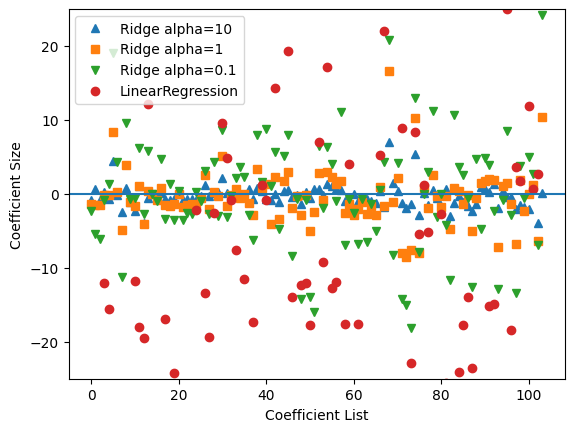

In [33]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient List")
plt.ylabel("Coefficient Size")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend();

- x축은 coef_의 원소를 위치대로 나열한 것. x=0은 첫 번째 특성에 연관된 계수이고 x=1은 두 번째 특성에 연관된 계수. 이런 식으로 x=100까지 계속됨
- y축은 각 계수의 수치를 나타냄. alpha=10일 때 대부분의 계수는 -3과 3 사이에 위치
- alpha=1 인 경우, Ridge 모델의 계수는 좀 더 커졌음
- alpha=0.1 인 경우, 계수는 더 커지며 아무런 규제가 없는(alpha=0) 선형 회귀의 계쑤는 값이 더 커져 그림 밖으로 넘어감
- 규제의 효과를 이해하는 또 다른 방법은 alpha 값을 고정하고 훈련 데이터의 크기를 변화시켜보는 것
- 학습 곡선 (Learning Curve) : 데이터셋의 크기에 따른 모델의 성능 변화를 나타낸 그래프

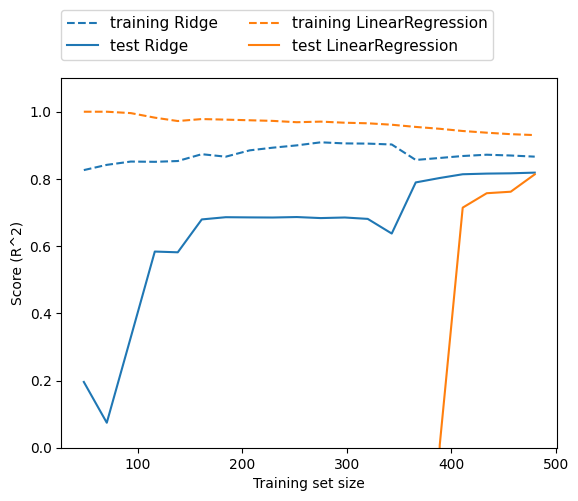

In [34]:
mglearn.plots.plot_ridge_n_samples()

- 예상대로 모든 데이터셋에 대해 리지와 선형 회귀 모두 훈련 세트의 점수가 테스트 세트의 점수보다 높음
- 리지에는 규제가 적용되므로 리지의 훈련 데이터 점수가 전체적으로 선형 회귀의 훈련 데이터 점수보다 낮음
- 반면 테스트 데이터에서는 리지의 점수가 더 높으며 특별히 작은 데이터셋에서는 더 강조됨
- 데이터셋 크기가 400 미만에서는 선형 회귀는 어떤 것도 학습하지 못하고있음
- 두 모델의 성능은 데이터가 많아질수록 좋아지고 마지막에는 선형 회귀가 리지 회귀를 따라잡음
- 데이터를 충분히 주면 규제 항은 덜 중요해져서 리지 회귀와 선형 회귀의 성능이 같아질 것
- 데이터가 많아질수록 모델이 데이터를 기억하거나 과대적합하기 어려워지기 때문에 선형 회귀의 훈련 데이터 성능이 감소하는 것으로 나타남

### 라소 (Lasso)
- 라소는 선형회귀 규제를 적용하는 데 Ridge의 대안으로 사용
- 라소도 계수를 0에 가깝게 만들려고 함
- 라소의 계수가 완벽히 0이 되는경우, 모델에서 완전히 제외되는 특성이 생긴다는 뜻
- 일부 계수를 0으로 만들면 모델을 이해하기 쉬워지고 해당 모델의 가장 중요한 특성이 무엇인지 표현해 줌

In [35]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso.coef_ != 0))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


In [36]:
# max_iter 기본값을 증가시키지 않으면 max_iter 값을 늘리라는 경고가 발생
lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso001.coef_ != 0))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


- alpha 값을 낮추면 모델의 복잡도는 증가, 훈련 세트와 테스트 세트에서의 성능이  좋아짐
- 성능은 Ridge보다 조금 나은데 사용된 특성은 104개 중 33개뿐이어서, 모델을 분석하기 더 쉬움
- alpha 값을 너무 낮추면 규제의 효과가 없어져 과대적합이 되므로 LinearRegression의 결과와 유사해짐

In [37]:
lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso00001.coef_ != 0))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 96


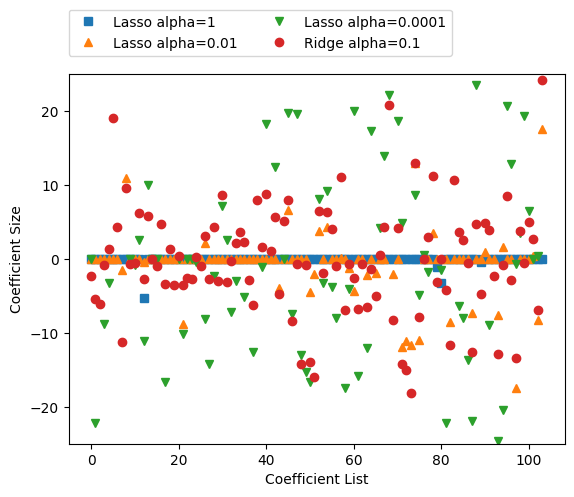

In [38]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient List")
plt.ylabel("Coefficient Size");

- alpha = 1 일때 계수 대부분이 0일 뿐만 아니라 나머지 계수들도 크기가 작음
- alpha를 0.01로 줄이면 대부분의 특성이 0이 되는 (정삼각형 모양으로 나타낸) 분포를 얻게 됨
- alpha = 0.0001이 되면 계수 대부분이 0이 아니고 값도 커져 꽤 규제받지 않은 모델을 얻게 됨
- 실제로 이 두 모델 중 보통은 리지 회귀를 선호. 하지만 특성이 많고 그 중 일부분만 중요하다면 라소가 좋은 선택일 수 있음

### 분류용 선형 모델
- 이진 분류 (Binary Classification) : 선, 평면, 초평면을 사용해서 두 개의 클래스를 구분하는 분류. 함수에서 계산한 값이 0보다 작으면 클래스를 -1이라고 예측하고, 0보다 크면 +1이라고 예측
- 선형 모델을 학습시키는 알고리즘 : 1) 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법 2) 사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지
- 가장 널리 알려진 두 개의 선형 분류 알고리즘은 linear_model.LogisticRegression에 구현된 '로지스틱 회귀(Logistic Regression)'와 svm.LinearSVC(SVC는 Support Vector Classifier의 약자)에 구현된 선형 '서포트 벡터 머신(Support Vector Machine)'

c:\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


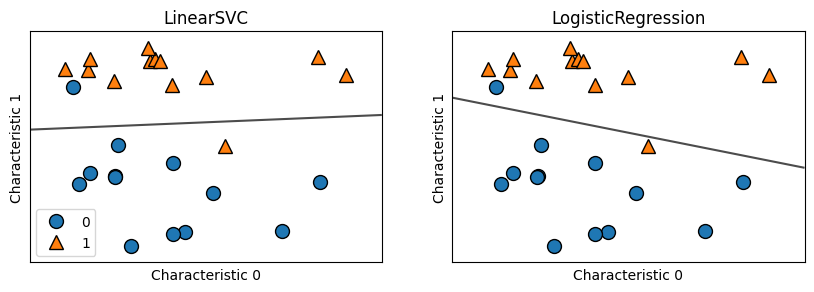

In [39]:
# forge 데이터셋을 사용하여 LogisticRegression과 LinearSVC 모델을 만들고 이 선형 모델들이 만들어낸 결정 경계를 시각화
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
  clf = model.fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title(clf.__class__.__name__)
  ax.set_xlabel("Characteristic 0")
  ax.set_ylabel("Characteristic 1")
axes[0].legend();

- 위 그림은 이전처럼 forge 데이터셋의 첫 번째 특성을 X축에 놓고 두 번째 특성을 y축에 놓았음
- LinearSVC와 LogisticRegression으로 만든 결정 경계가 직선으로 표현되었고. 직선 위쪽에 놓이면 클래스 1로 분류될 것이고, 직선 아래쪽에 놓이면 클래스 0으로 분류될 것(위쪽은 클래스 1, 아래쪽은 클래스 0으로 나뉨)
- 두 모델은 비슷한 결정 경계를 만들었고, 똑같이 포인트 두 개를 잘못 분류
- LogisticRegression과 LinearSVC에서 규제의 강도를 결정하는 매개변수는 C. C의 값이 높아지면 규제가 감소
- 매개변수로 높은 C 값을 지정하면 LogisticRegression과 LinearSVC는 훈련 세트에 가능한 최대로 맞추려 하고, 반면 C값을 낮추면 모델은 계수 벡터(w)가 0에 가까워지도록 만듦
- 매개변수 C의 작동 방식을 다르게 설명하면, 알고리즘은 C의 값이 낮아지면 데이터 포인트 중 다수에 맞추려고 하는 반면, C의 값을 높이면 개개의 데이터 포인트를 정확하게 분류하려고 노력할 것

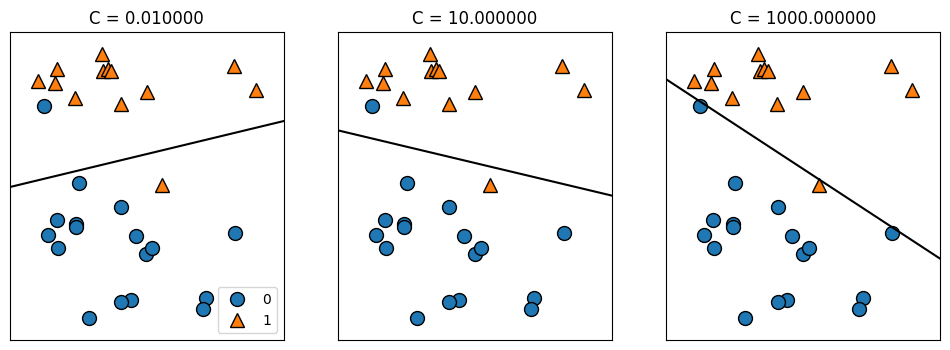

In [40]:
# LinearSVC를 사용한 예
mglearn.plots.plot_linear_svc_regularization()

- 왼쪽 그림은 아주 작은 C 값 때문에 규제가 많이 적용. 클래스 0의 대부분은 아래에 있고, 클래스 1의 대부분은 위에 있음. 규제가 강한 모델은 비교적 수평에 가까운 결정경계를 만들었고 잘못 분류한 데이터 포인트는 2개
- 중간 그림은 C 값이 조금 더 크며 잘못 분류한 두 샘플에 민감해져 결정 경계가 기울어짐
- 오른쪽 그림은 C 값을 아주 크게 하였더니 결정 경계는 더 기울었고 마침내 클래스 0의 모든 데이터 포인트를 올바로 분류. 모든 데이터 포인트를 정확하게 분류하려고 노력했으나, 클래스의 전체적인 배치를 잘 파악하지 못해 과대 적합된 것으로 판단
- 회귀와 비슷하게 분류에서의 선형 모델은 낮은 차원의 데이터에서는 결정 경계가 직선이거나 평면이어서 매우 제한적인 것으보 보임
- 하지만 고차원에서는 분류에 대한 선형 모델이 매우 강력해지며 특성이 많아지면 과대적합되지 않도록 하는 것이 매우 중요해짐

In [41]:
# 유방암 데이터셋을 사용해서 LogisticRegression을 좀 더 자세히 분석
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("Train Set Score : {:.3f}".format(logreg.score(X_train, y_train)))
print("Test Set Score : {:.3f}".format(logreg.score(X_test, y_test)))

Train Set Score : 0.958
Test Set Score : 0.958


- 기본값 C=1이 훈련 세트와 테스트 세트 양쪽에 95% 정확도로 훌륭한 성능을 내고 있음
- 하지만 훈련 세트와 테스트 세트의 성능이 매우 비슷하므로 과소적합으로 판단

In [42]:
# 모델의 제약을 더 풀어주기 위해 C를 중가시킴
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print("Train Set Score : {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test Set Score : {:.3f}".format(logreg100.score(X_test, y_test)))

Train Set Score : 0.981
Test Set Score : 0.965


- C=100을 사용하니 훈련 세트의 정확도가 높아졌고, 테스트 세트의 정확도도 조금 증가
- 복잡도가 높은 모델일수록 성능이 좋음을 뜻함

In [43]:
# 규제를 더 강하게 하기 위해 기본값(C=1)이 아닌 C=0.01을 사용
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print("Train Set Score : {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test Set Score : {:.3f}".format(logreg001.score(X_test, y_test)))

Train Set Score : 0.953
Test Set Score : 0.951


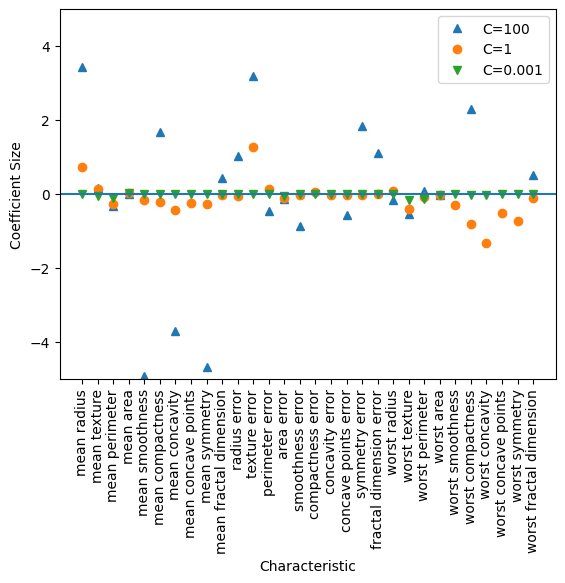

In [44]:
# 규제 매개변수 C 설정을 세 가지로 다르게 하여 학습시킨 모델의 계수 확인
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims=plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Characteristic")
plt.ylabel("Coefficient Size")
plt.legend();

- LogisticRegression은 기본으로 L2 규제를 적용하므로 Ridge로 만든 모습과 유사
- 규제를 강하게 할수록 계수들을 0에 더 가깝게 만들지만 완전히 0이 되지는 않음

C=0.001, Training Accuracy of l1 Logistic Regression : 0.91
C=0.001, Test Accuracy of l1 Logistic Regression : 0.92
C=1.000, Training Accuracy of l1 Logistic Regression : 0.96
C=1.000, Test Accuracy of l1 Logistic Regression : 0.96
C=100.000, Training Accuracy of l1 Logistic Regression : 0.99
C=100.000, Test Accuracy of l1 Logistic Regression : 0.98


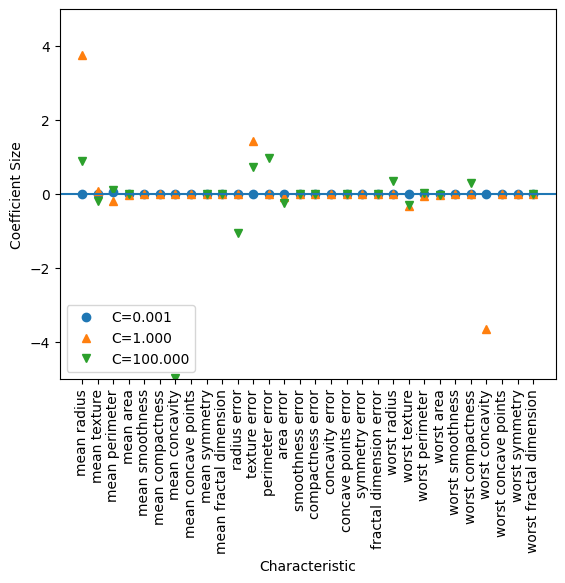

In [45]:
# 더 이해하기 쉬운 모델( 모델의 몇 개의 특성만을 사용)을 원한다면 L1 규제를 사용하는 것이 좋음
# 다음은 L1 규제를 사용할 때의 분류 정확도와 계수 그래프
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
  lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
  print("C={:.3f}, Training Accuracy of l1 Logistic Regression : {:.2f}".format(C, lr_l1.score(X_train, y_train)))
  print("C={:.3f}, Test Accuracy of l1 Logistic Regression : {:.2f}".format(C, lr_l1.score(X_test, y_test)))
  plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Characteristic")
plt.ylabel("Coefficient Size")
plt.ylim(-5, 5)
plt.legend(loc=3);

### 다중 클래스 분류용 선형 모델
- (로지스틱스 회귀를 제외한) 많은 선형 분류 모델은 태생적으로 이진 분류만을 지원
- 이전 분류 알고리즘을 다중 클래스 분류 알고리즘으로 확장하는 보편적인 기법은 일대다(one -vs. -rest) 방법
- 일대다 방식은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시키므로, 결국 클래스의 수 만큼 이진 분류 모델이 만들어짐
- 예측을 할 때 이렇게 만들어진 모든 이진 분류기가 작동하여 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택
- 다중 클래스 로지스틱 회귀 이면의 수학은 일대다 방식과는 조금 다르지만 여기서도 클래스마다 하나의 계수 벡터와 절편을 만들며, 예측 방법도 같음

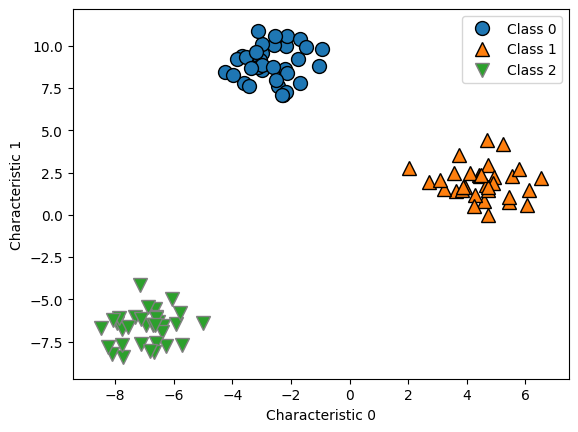

In [46]:
# 세 개의 클래스를 가진 간단한 데이터셋에 일대다 방식을 적용
# 이 데이터셋은 2차원이며 각 클래스의 데이터는 정규분포를 따름
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Characteristic 0")
plt.ylabel("Characteristic 1")
plt.legend(["Class 0", "Class 1", "Class 2"]);

In [47]:
# 이 데이터셋으로 LinearSVC 분류기를 훈련
linear_svm = LinearSVC().fit(X, y)
print("Size of Coefficient Array : ", linear_svm.coef_.shape)
print("Size of Intercept Array : ", linear_svm.intercept_.shape)

Size of Coefficient Array :  (3, 2)
Size of Intercept Array :  (3,)


c:\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


- coef_ 배열의 크기는 (3, 2). coef_의 행은 세 개의 클래스에 각각 대응하는 계수 벡터를 담고 있으며, 열은 각 특성에 따른 계수 값(이 데이터셋에서는 두 개)를 가지고 있음
- intercept_는 각 클래스의 절편을 담은 1차원 벡터

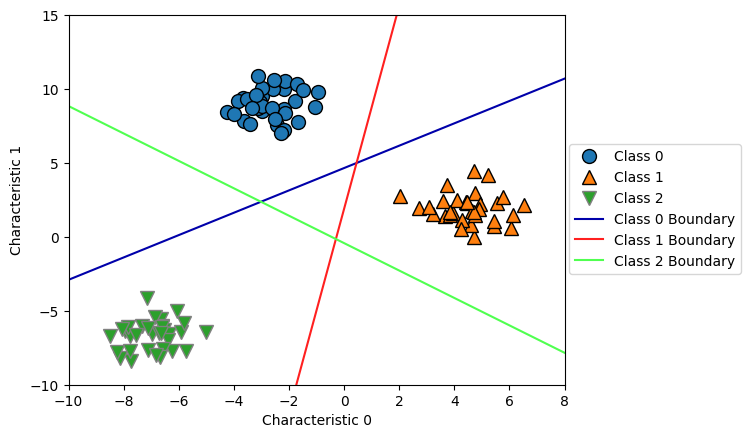

In [48]:
# 세 개의 이진 분류기가 만드는 경계를 시각화
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Characteristic 0")
plt.ylabel("Characteristic 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Class 0 Boundary", "Class 1 Boundary", "Class 2 Boundary"], loc=(1.01, 0.3));

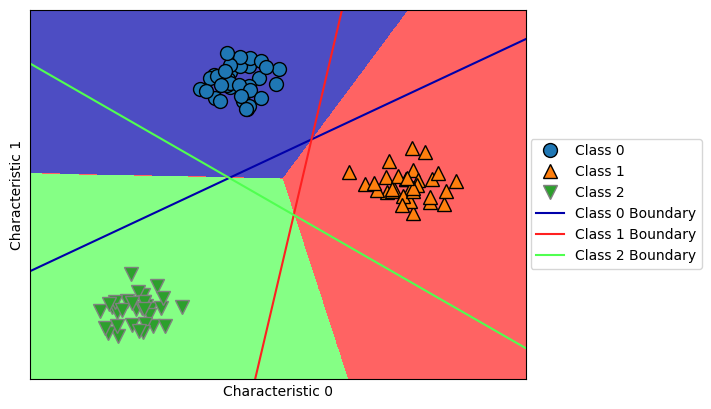

In [49]:
# 다음 예는 2차원 평면의 모든 포인트에 대한 예측 결과를 보여줌
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(["Class 0", "Class 1", "Class 2", "Class 0 Boundary", "Class 1 Boundary", "Class 2 Boundary"], loc=(1.01, 0.3))
plt.xlabel("Characteristic 0")
plt.ylabel("Characteristic 1");

### 장단점과 매개변수
- 선형 모델의 주요 매개변수는 회귀 모델에서는 alpha였고 LinearSVC와 Logistic Regression에서는 C
- alpha 값이 클수록, C 값이 작을수록 모델이 단순해짐
- 보통 C와 alpha는 로그 스케일로 최적치를 정함
- 중요한 특성이 많지 않다고 생각하면 L1 규제를 사용하고, 그렇지 않으면 기본적으로 L2 규제를 사용
- L1 규제는 모델의 해석이 중요한 요소일 때도 사용할 수 있음
- L1 규제는 몇 가지 특성만 사용하므로 해당 모델에 중요한 특성이 무엇이고 그 효과가 어느 정도인지 설명하기 용이
- 선형 모델은 학습 속도와 예측이 빠름. 앞서 회귀와 분류에서 본 공식을 사용해 예측이 어떻게 만들어지는지 비교적 쉽게 이해할 수 있음
- 하지만 계수의 값들이 왜 그런지 명확하지 않을 때가 종종있음. 특히 데이터셋의 특성들이 서로 깊게 연관되어 있을 때, 이 경우에는 계수를 분석하기가 매우 어려움
- 선형 모델은 샘플에 비해 특성이 많을 때 잘 작동. 다른 모델로 학습하기 어려운 매우 큰 데이터셋에도 선형 모델을 많이 사용
- 그러나 저차원의 데이터셋에서는 다른 모델들의 일반화 성능이 더 좋음

In [50]:
# 메서드 연결. 모든 scikit-learn의 fit 메서드는 self를 반환
# 한 줄에서 모델의 객체를 생성과 학습을 한번에 실행
logreg = LogisticRegression().fit(X_train, y_train)
# scikit-learn에서는 fit과 predict를 한 줄에 쓰는 메서드 연결도 자주 사용
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)
# 모델의 객체를 만들고, 훈련하고, 예측하는 일을 모두 한 줄에 쓸 수 있음
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)
# 한 줄에 너무 많은 메서드가 들어가면 코드를 읽기 어려워짐. 더군다나 학습된 로지스틱 회귀 모델을 변수에 할당되지 않아 (예측 결과를 담은 변수만 남음) 다른 데이터에 대해 예측하거나 만들어진 모델을 분석할 수 없음

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

- SGDClassifier와 SGDRegressor는 확률적 경사 하강법(Stochastic Gradient Descent)을 사용하여 다양항 선형 모델을 훈련
- loss 매개변수에 최적화할 손실 함수를 지정
- SGDClassifier의 loss 기본값은 힌지 손실인 'hinge'이며 서포트 벡터 머신 모델을 훈련
- 앞서 사용했던 간단한 다중 분류 데이터셋에 SGDClassifier를 훈련. 훈련 결과를 항상 동일하게 만들기 위해 random_state를 고정

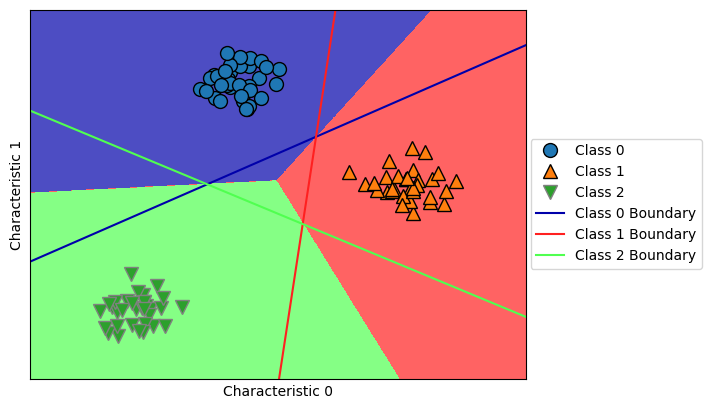

In [51]:
from sklearn.linear_model import SGDClassifier

sgd_c = SGDClassifier(alpha=0.01, learning_rate='adaptive', eta0=0.1, random_state=42, n_jobs=1)
sgd_c.fit(X, y)
mglearn.plots.plot_2d_classification(sgd_c, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(sgd_c.coef_, sgd_c.intercept_, mglearn.cm3.colors):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(["Class 0", "Class 1", "Class 2", "Class 0 Boundary", "Class 1 Boundary", "Class 2 Boundary"], loc=(1.01, 0.3))
plt.xlabel("Characteristic 0")
plt.ylabel("Characteristic 1")
plt.show();

In [52]:
# 확장된 보스턴 데이터셋에 SGDRegressor 모델을 훈련
from sklearn.linear_model import SGDRegressor

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

sgd_r = SGDRegressor(learning_rate='adaptive', eta0=0.1, random_state=42)
sgd_r.fit(X_train, y_train)

print("Train Set Score : {:.2f}".format(sgd_r.score(X_train, y_train)))
print("Test Set Score : {:.2f}".format(sgd_r.score(X_test, y_test)))

Train Set Score : 0.91
Test Set Score : 0.77


## 3-4. 나이브 베이즈 분류기 (Naive Bayes)
- 선형 모델과 유사. LogisticRegression이나 LinearSVC 같은 선형 분류기보다 훈련 속도가 빠른 편이지만, 그 대신 일반화 성능이 조금 떨어짐
- 나이브 베이즈 분류기가 효과적인 이유는 각 특성을 개별로 취급해 파라미터를 학습하고 각 특성에서 클래스별 통계를 단순하게 취합
- scikit-learn에 구현된 나이브 베이즈 분류기는 GaussianNB, BernoulliNB, MultinomialNB 이렇게 세 가지
- GaussianNB : 연속적인 어떤 데이터에도 적용할 수 있음
- BernoulliNB : 이진 데이터에 적용가능
- MultinomialNB : 카운트 데이터(특성이 어떤 것을 헤아린 정수 카운트로, 예를 들면 문장에 나타난 단어의 획수)

In [53]:
# BernoulliNB 분류기는 각 클래스의 특성 중 0이 아닌 것이 몇 개인지 셈
X = np.array([[0, 1, 0, 1],
             [1, 0, 1, 1],
             [0, 0, 0, 1],
             [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [54]:
counts = {}
for label in np.unique(y):
  # 각 클래스에 대해 반복
  # 특성마다 1이 나타난 횟수를 셈
  counts[label] = X[y == label].sum(axis=0)
  print("특성 카운트:\n", counts)

특성 카운트:
 {0: array([0, 1, 0, 2])}
특성 카운트:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


### 장단점과 매개변수
- MultinomialNB와 BernoulliNB는 모델의 복잡도를 조절하는 alpha 매개변수 하나를 가지고 있음
- alpha가 크면 더 완만해지고 모델의 복잡도는 낮아짐. alpha에 따른 알고리즘 성능 변동은 비교적 크지 않아서, alpha 값이 성능 향상에 크게 기여하지 않지만, 이 값을 조정하면 어느 정도는 정확도를 높일 수 있음
- GaussianNB는 대부분 매우 고차원인 데이터셋에 사용하고, 다른 두 나이브 베이즈 모델은 텍스트 같은 희소한 데이터를 카운트하는 데 사용
- MultinomialNB는 보통 0이 아닌 특성이 비교적 많은 데이터셋(예를 들어 큰 문서들)에서 BernoulliNB보다 성능이 높음
- 나이브 베이즈 모델과 선형 모델의 장단점은 유사. 훈련과 예측 속도가 빠르며 훈련 과정을 이해하기 쉬움
- 희소한 고차원 데이터에서 잘 작동하며 비교적 매개변수에 민감하지 않음
- 선형 모델로는 학습 시간이 너무 오래 걸리는 매우 큰 데이터셋에는 나이브 베이즈 모델을 시도해볼 만하며 종종 사용됨

## 3-5. 결정트리 (Decision Tree)
- 결정트리는 분류와 회귀 문제에 널리 사용하는 모델
- 기본적으로 결정 트리는 결정에 다다르기 위해 예/아니오 질문을 이어 나가면서 학습

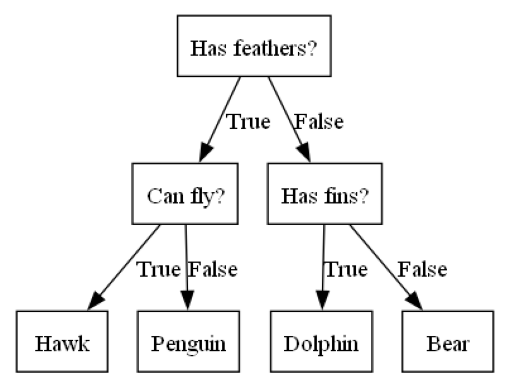

In [55]:
# 연속된 질문들을 결정 트리로 나타낼 수 있음
mglearn.plots.plot_animal_tree();